# 1 Графики распределений

In [88]:
import numpy as np
from scipy.stats import norminvgauss, poisson, cauchy, uniform, norm
import matplotlib.pyplot as plt
import math

sizes = [10, 50, 1000]

## - Нормальное распределение

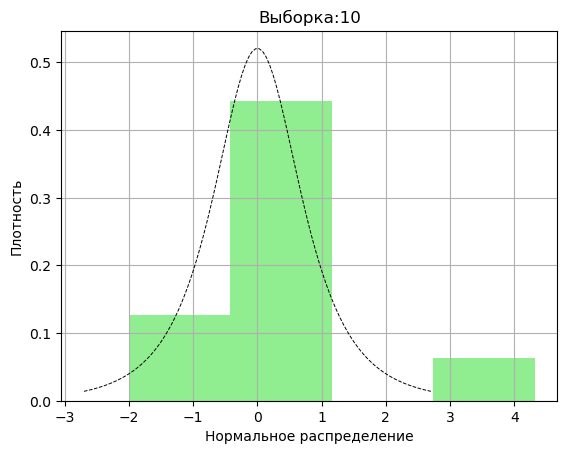

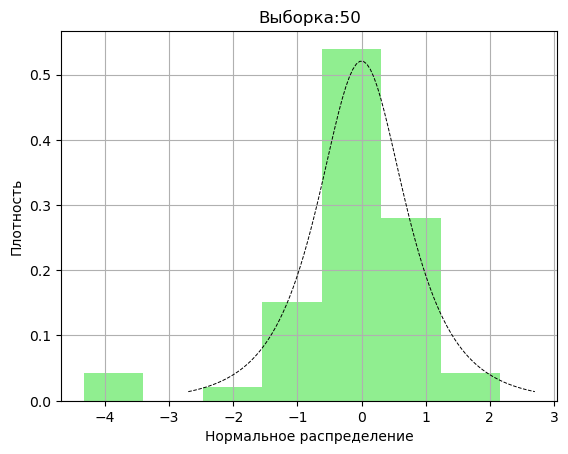

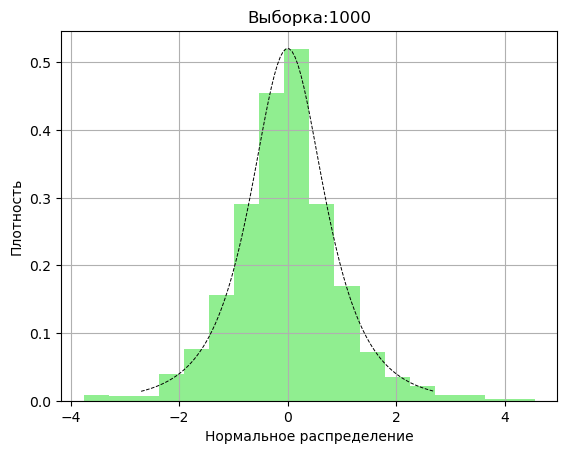

In [90]:
for size in sizes:
    density = norminvgauss(1, 0)
    histogram = norminvgauss.rvs(1, 0, size=size)
    fig, ax = plt.subplots(1, 1)
    b = int(1.72*size**(0.333))+1
    ax.hist(histogram, bins = b, density = True, color = "lightgreen")
    x = np.linspace(density.ppf(0.01), density.ppf(0.99), 100) #ppf - точка до которой вероятность 0.01, 
    ax.plot(x, density.pdf(x), 'k--', lw=0.7)
    ax.set_xlabel("Нормальное распределение")
    ax.set_ylabel("Плотность")
    ax.set_title("Выборка:" + str(size))
    plt.grid()
    plt.savefig("Normal"+str(size))
    #plt.show()

## - Распределение Коши

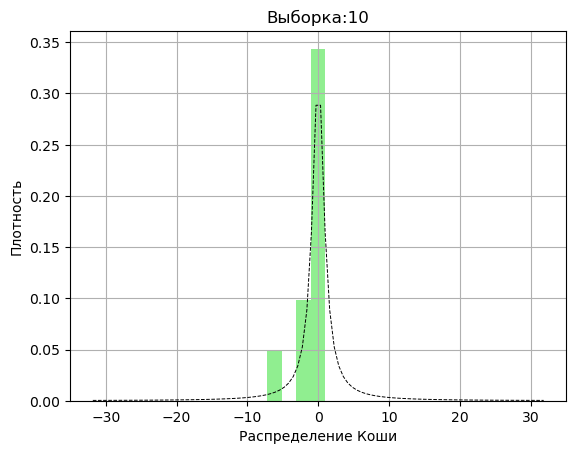

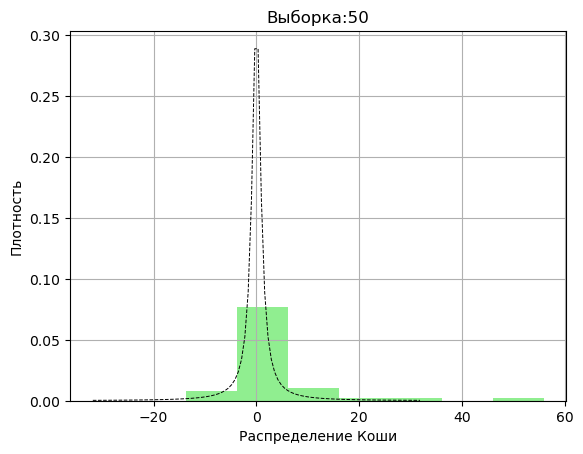

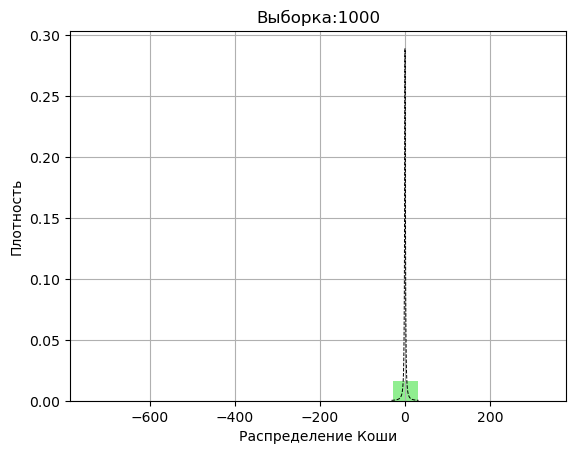

In [94]:
for size in sizes:
    density = cauchy()
    histogram = cauchy.rvs(size=size)
    fig, ax = plt.subplots(1, 1)
    b = int(1.72*size**(0.333))+1
    ax.hist(histogram, bins = b, density = True, color = "lightgreen")
    x = np.linspace(density.ppf(0.01), density.ppf(0.99), 100)
    ax.plot(x, density.pdf(x), 'k--', lw=0.7)
    ax.set_xlabel("Распределение Коши")
    ax.set_ylabel("Плотность")
    ax.set_title("Выборка:" + str(size))
    plt.grid()
    plt.savefig("Cauchy"+str(size))
    #plt.show()


## - Распределение Пуассона

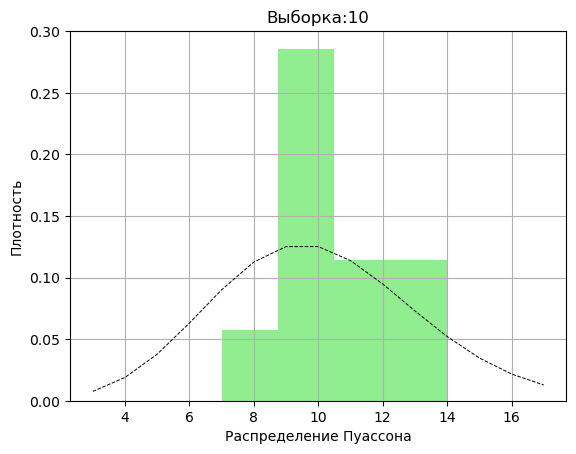

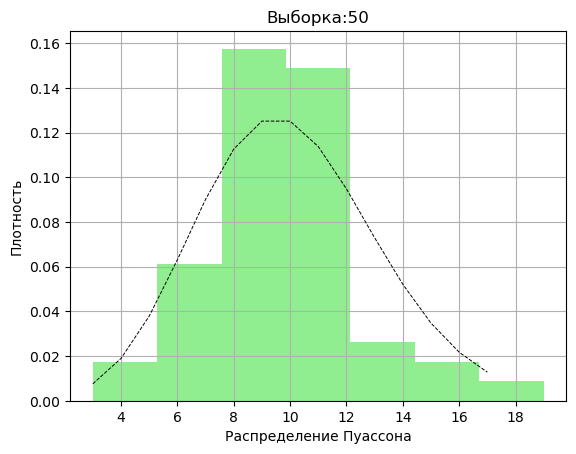

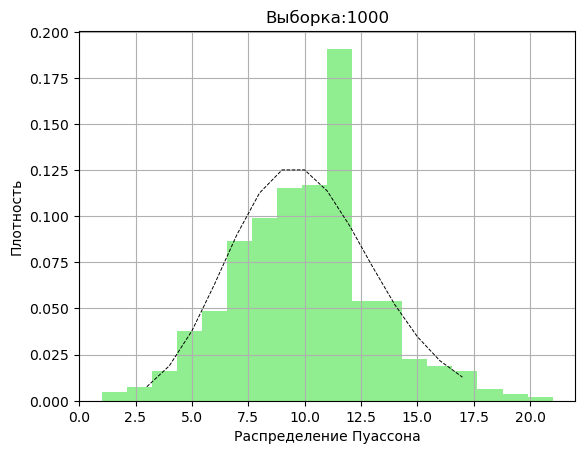

In [102]:
for size in sizes:
    density = poisson(10)
    histogram = poisson.rvs(10, size=size)
    fig, ax = plt.subplots(1, 1)
    b = int(1.72*size**(0.333))+1
    ax.hist(histogram, bins = b, density = True, color = "lightgreen")
    x = np.arange(poisson.ppf(0.01, 10), poisson.ppf(0.99, 10))
    ax.plot(x, density.pmf(x), 'k--', lw=0.7)
    ax.set_xlabel("Распределение Пуассона")
    ax.set_ylabel("Плотность")
    ax.set_title("Выборка:" + str(size))
    plt.grid()
    plt.savefig("Poisson"+str(size))


## - Равномерное распределение

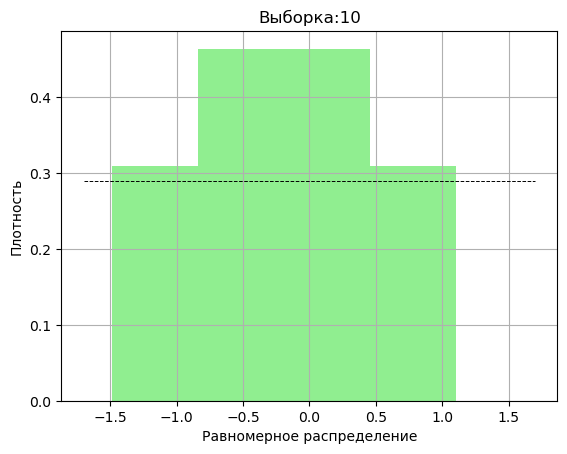

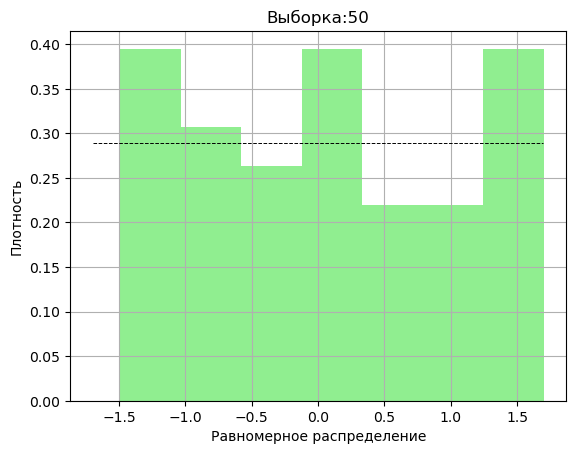

In [ ]:
for size in sizes:
    density = uniform(loc=-math.sqrt(3), scale=2 * math.sqrt(3))
    histogram = uniform.rvs(size=size, loc=-math.sqrt(3), scale=2 * math.sqrt(3))
    fig, ax = plt.subplots(1, 1)
    b = int(1.72*size**(0.333))+1
    ax.hist(histogram, bins = b, density=True, color="lightgreen")
    x = np.linspace(density.ppf(0.01), density.ppf(0.99), 100)
    ax.plot(x, density.pdf(x), 'k--', lw=0.7)
    ax.set_xlabel("Равномерное распределение")
    ax.set_ylabel("Плотность")
    ax.set_title("Выборка:" + str(size))
    plt.grid()
    #plt.show()
    plt.savefig("Uniform"+str(size))


# 2 Числовые характеристики

In [12]:

sizes = [10, 100, 1000]

N = 1000

def mean(selection): #выборочное среднее
    return np.mean(selection)

def median(selection): #выборочная медиана
    return np.median(selection)

def zP(selection, np): #выборочная квартиль
    if np%1==0:
        return selection[int(np)]
    else:
        return selection[int(np) + 1]

def zQ(selection, size): #полусумма квартилей
    z_1 = zP(selection, size / 4)
    z_2 = zP(selection, 3 * size / 4)
    return (z_1 + z_2) / 2

def dispersion(selection): #дисперсия
    return np.std(selection) ** 2


In [12]:
sizes = [10, 100, 1000]

N = 1000

def mean(selection): #выборочное среднее
    return np.mean(selection)

def median(selection): #выборочная медиана
    return np.median(selection)

def zP(selection, np): #выборочная квартиль
    if np%1==0:
        return selection[int(np)]
    else:
        return selection[int(np) + 1]

def zQ(selection, size): #полусумма квартилей
    z_1 = zP(selection, size / 4)
    z_2 = zP(selection, 3 * size / 4)
    return (z_1 + z_2) / 2

def dispersion(selection): #дисперсия
    return np.std(selection) ** 2


In [44]:
p = 4
print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}[t]{|l|r|r|r|}\n')
print('\\hline \n')
print('Характеристики   &  mean &    median &      $z_Q$\\\\ \\hline \n')
for size in sizes:
    mean_list, medianList, zQList = [], [], []
    all_list = [mean_list, medianList, zQList]
    E, D, E_minus_D, E_plus_D = [], [], [], []
    E2 =[]
    for i in range(N):
        distribution = norm.rvs(size = size)
        distribution.sort()
        mean_list.append(mean(distribution))
        medianList.append(median(distribution))
        zQList.append(zQ(distribution, size))
        
    for lis in all_list:
        E.append(round(mean(lis), p))
        E2.append(round(mean([lis[k] ** 2 for k in range(N)]), p))
        D.append(round(dispersion(lis), p))
    print('\\hline \n')
    print('n='+str(size)+'& & & &')
    print('$E(z)$&', end ='')
    print(*E, sep="&", end ="\\\\")
    print('\n')
    print('$E(z^{2})$&', end ='')
    print(*E2, sep="&", end ='\\\\')
    print('\n')
    print('$D(z)$&', end ='')
    print(*D, sep="&", end ='\\\\')
    print('\n')
    print("\\hline")
    

print('\\end{tabular}')
print('\\caption{Нормальное распределение}')
print('\\label{}')
print('\\end{table}')

\begin{table}[H]
\centering
\begin{tabular}[t]{|l|r|r|r|}

\hline 

Характеристики   &  mean &    median &      $z_Q$\\ \hline 

\hline 

n=10& & & &
$E(z)$&0.0167&0.0169&0.3396\\

$E(z^{2})$&0.1021&0.1414&0.2395\\

$D(z)$&0.1018&0.1411&0.1242\\

\hline
\hline 

n=100& & & &
$E(z)$&-0.0005&0.0008&0.0153\\

$E(z^{2})$&0.0094&0.0148&0.012\\

$D(z)$&0.0094&0.0148&0.0118\\

\hline
\hline 

n=1000& & & &
$E(z)$&0.0002&0.0009&0.0003\\

$E(z^{2})$&0.0009&0.0015&0.0011\\

$D(z)$&0.0009&0.0015&0.0011\\

\hline
\end{tabular}
\caption{Нормальное распределение}
\label{}
\end{table}


In [50]:
p = 4
print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}[t]{|l|r|r|r|}\n')
print('\\hline \n')
print('Характеристики   &  mean &    median &      $z_Q$\\\\ \\hline \n')
for size in sizes:
    mean_list, medianList, zQList = [], [], []
    all_list = [mean_list, medianList, zQList]
    E, D, E2, E_minus_D, E_plus_D = [], [], [], [], []
    for i in range(N):
        distribution = cauchy.rvs(size=size)
        distribution.sort()
        mean_list.append(mean(distribution))
        medianList.append(median(distribution))
        zQList.append(zQ(distribution, size))
        
    for lis in all_list:
        E.append(round(mean(lis), p))
        E2.append(round(mean([lis[k] ** 2 for k in range(N)]), p))
        D.append(round(dispersion(lis), p))
    print('\\hline \n')
    print('n='+str(size)+'& & & &')
    print('$E(z)$&', end ='')
    print(*E, sep="&", end ="\\\\")
    print('\n')
    print('$E(z^{2})$&', end ='')
    print(*E2, sep="&", end ='\\\\')
    print('\n')
    print('$D(z)$&', end ='')
    print(*D, sep="&", end ='\\\\')
    print('\n')
    print("\\hline")
    

print('\\end{tabular}')
print('\\caption{Распределение Коши}')
print('\\label{}')
print('\\end{table}')

\begin{table}[H]
\centering
\begin{tabular}[t]{|l|r|r|r|}

\hline 

Характеристики   &  mean &    median &      $z_Q$\\ \hline 

\hline 

n=10& & & &
$E(z)$&-0.7457&-0.0097&1.0709\\

$E(z^{2})$&328.9104&0.3726&6.4359\\

$D(z)$&328.3543&0.3725&5.289\\

\hline
\hline 

n=100& & & &
$E(z)$&-1.7218&0.0112&0.0525\\

$E(z^{2})$&3069.4867&0.0246&0.0553\\

$D(z)$&3066.5221&0.0245&0.0525\\

\hline
\hline 

n=1000& & & &
$E(z)$&-0.4238&0.0003&0.006\\

$E(z^{2})$&414.1527&0.0025&0.0053\\

$D(z)$&413.9731&0.0025&0.0053\\

\hline
\end{tabular}
\caption{Распределение Коши}
\label{}
\end{table}


In [52]:
print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}[t]{|l|r|r|r|}\n')
print('\\hline \n')
print('Характеристики   &  mean &    median &      $z_Q$\\\\ \\hline \n')
for size in sizes:
    mean_list, medianList, zQList = [], [], []
    all_list = [mean_list, medianList, zQList]
    E, D,  E2, E_plus_D = [], [], [], []
    for i in range(N):
        distribution = poisson.rvs(10, size=size)
        distribution.sort()
        mean_list.append(mean(distribution))
        medianList.append(median(distribution))
        zQList.append(zQ(distribution, size))
    for lis in all_list:
        E.append(round(mean(lis), p))
        E2.append(round(mean([lis[k] ** 2 for k in range(N)]), p))
        D.append(round(dispersion(lis), p))
    print('\\hline \n')
    print('n='+str(size)+'& & & &')
    print('$E(z)$&', end ='')
    print(*E, sep="&", end ="\\\\")
    print('\n')
    print('$E(z^{2})$&', end ='')
    print(*E2, sep="&", end ='\\\\')
    print('\n')
    print('$D(z)$&', end ='')
    print(*D, sep="&", end ='\\\\')
    print('\n')
    print("\\hline")
    

print('\\end{tabular}')
print('\\caption{Распределение Пуассона}')
print('\\label{}')
print('\\end{table}')


\begin{table}[H]
\centering
\begin{tabular}[t]{|l|r|r|r|}

\hline 

Характеристики   &  mean &    median &      $z_Q$\\ \hline 

\hline 

n=10& & & &
$E(z)$&10.0408&9.8905&10.9915\\

$E(z^{2})$&101.8636&99.3042&122.2262\\

$D(z)$&1.0459&1.4823&1.4132\\

\hline
\hline 

n=100& & & &
$E(z)$&9.9973&9.809&9.9715\\

$E(z^{2})$&100.0515&96.4335&99.6032\\

$D(z)$&0.1059&0.217&0.1724\\

\hline
\hline 

n=1000& & & &
$E(z)$&9.9968&9.995&9.9955\\

$E(z^{2})$&99.9468&99.9045&99.9132\\

$D(z)$&0.0101&0.0045&0.0032\\

\hline
\end{tabular}
\caption{Распределение Пуассона}
\label{}
\end{table}


In [54]:
print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}[t]{|l|r|r|r|}\n')
print('\\hline \n')
print('Характеристики   &  mean &    median &      $z_Q$\\\\ \\hline \n')
for size in sizes:
    mean_list, medianList, zQList = [], [], []
    all_list = [mean_list, medianList, zQList]
    E, D, E2, E_plus_D = [], [], [], []
    for i in range(N):
        distribution = uniform.rvs(size=size, loc=-math.sqrt(3), scale=2 * math.sqrt(3))
        distribution.sort()
        mean_list.append(mean(distribution))
        medianList.append(median(distribution))
        zQList.append(zQ(distribution, size))
    for lis in all_list:
        E.append(round(mean(lis), p))
        E2.append(round(mean([lis[k] ** 2 for k in range(N)]), p))
        D.append(round(dispersion(lis), p))
    print('\\hline \n')
    print('n='+str(size)+'& & & &')
    print('$E(z)$&', end ='')
    print(*E, sep="&", end ="\\\\")
    print('\n')
    print('$E(z^{2})$&', end ='')
    print(*E2, sep="&", end ='\\\\')
    print('\n')
    print('$D(z)$&', end ='')
    print(*D, sep="&", end ='\\\\')
    print('\n')
    print("\\hline")
    

print('\\end{tabular}')
print('\\caption{Равномерное распределение}')
print('\\label{}')
print('\\end{table}')

\begin{table}[H]
\centering
\begin{tabular}[t]{|l|r|r|r|}

\hline 

Характеристики   &  mean &    median &      $z_Q$\\ \hline 

\hline 

n=10& & & &
$E(z)$&-0.0067&-0.0102&0.3033\\

$E(z^{2})$&0.0972&0.2121&0.2202\\

$D(z)$&0.0972&0.212&0.1282\\

\hline
\hline 

n=100& & & &
$E(z)$&0.004&-0.0013&0.0235\\

$E(z^{2})$&0.01&0.0274&0.0163\\

$D(z)$&0.01&0.0274&0.0157\\

\hline
\hline 

n=1000& & & &
$E(z)$&-0.0024&-0.0038&-0.0007\\

$E(z^{2})$&0.001&0.0032&0.0015\\

$D(z)$&0.001&0.0032&0.0015\\

\hline
\end{tabular}
\caption{Равномерное распределение}
\label{}
\end{table}
